In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv(r'D:\Assignments\EDA1\Cardiotocographic.csv')
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [3]:
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

Hence we don't need to change dtype all are in float only

In [4]:
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [5]:
df['LB'].fillna(df.LB.mean(),inplace=True)
df['AC'].fillna(df.AC.median(),inplace=True)
df['DS'].fillna(df.DS.median(),inplace=True)
df['DP'].fillna(df.DP.mean(),inplace=True)
df['MLTV'].fillna(df.MLTV.median(),inplace=True)
df['Width'].fillna(df.Width.median(),inplace=True)
df['Tendency'].fillna(df.Tendency.median(),inplace=True)
df['NSP'].fillna(df.NSP.median(),inplace=True)

In [6]:
df.isnull().sum()

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64

TREATING OUTLIERS


<Axes: >

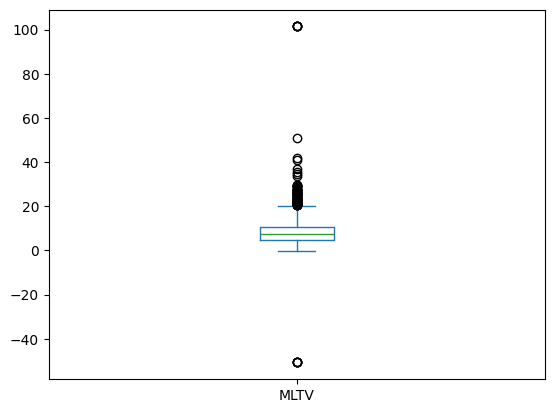

In [7]:
df.MLTV.plot(kind='box')

whiskers [<matplotlib.lines.Line2D object at 0x0000021AFFE38E60>, <matplotlib.lines.Line2D object at 0x0000021AFFE39100>]
caps [<matplotlib.lines.Line2D object at 0x0000021AFFE39250>, <matplotlib.lines.Line2D object at 0x0000021AFFE394F0>]
boxes [<matplotlib.lines.Line2D object at 0x0000021AFD90B5F0>]
medians [<matplotlib.lines.Line2D object at 0x0000021AFFE397F0>]
fliers [<matplotlib.lines.Line2D object at 0x0000021AFFE39A00>]
means []
[array([ 52.        ,  52.        ,  51.84248683,  52.1885468 ,
       214.        , 214.        , 214.        , 214.        ,
       214.        , 214.        ])]
wiskers [106.0, 160.0]


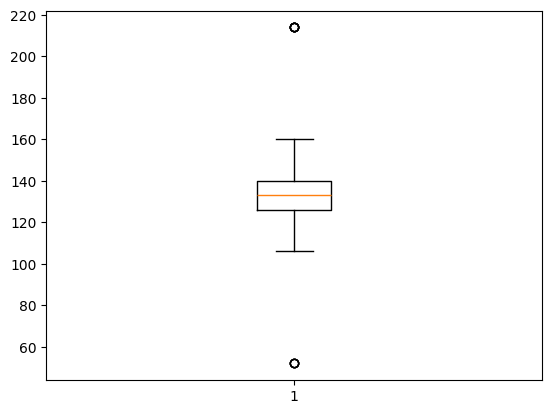

In [8]:
lb_box=plt.boxplot(x='LB',data=df)
for i,j in lb_box.items():
    print(i,j)
out=[]
for item in lb_box['fliers']:
    out.append(item.get_ydata())
print(out)
print("wiskers",[item.get_ydata()[1] for item in lb_box['whiskers']])
df.LB[(df.LB)>=160]=160
df.LB[(df.LB)<=106]=106

In [9]:
#data.price[(data.price>3*a)]=3*a
df.LB

0       120.000000
1       132.000000
2       133.000000
3       134.000000
4       131.948232
           ...    
2121    140.000000
2122    140.000000
2123    140.000000
2124    140.000000
2125    142.000000
Name: LB, Length: 2126, dtype: float64

[array([-0.01928375, -0.01928375, -0.01928375, -0.01928375,  0.03856749,
        0.01470588,  0.01423027,  0.03856749,  0.01724138,  0.01417848,
        0.0155521 ,  0.01525822,  0.01417848,  0.01472557,  0.01501251,
        0.0140647 ,  0.01928375,  0.0155902 ,  0.01642336,  0.01578192,
        0.01480638,  0.03856749,  0.0173913 ,  0.01402373,  0.01490683,
        0.01430274,  0.01564246,  0.01766785,  0.01734104,  0.03856749,
        0.01785714,  0.01431981,  0.01511335,  0.0144    ,  0.01406799,
        0.01590668,  0.01707317,  0.01516588,  0.01444444,  0.016     ,
        0.0148423 ,  0.03856749,  0.03856749])]
[-0.000184863, 0.013861386]


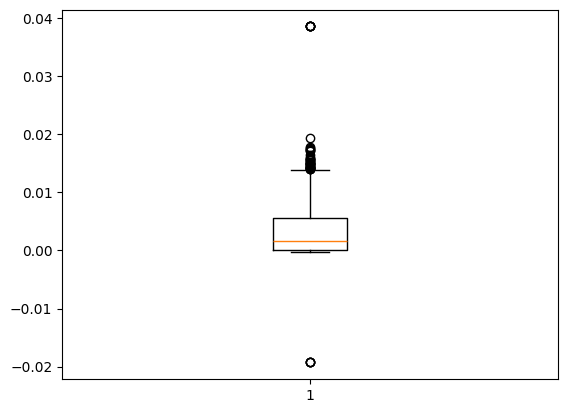

In [10]:
ac_box=plt.boxplot(x='AC',data=df)
#getting outliers
out1=[]
for item1 in ac_box['fliers']:
    out1.append(item1.get_ydata())
print(out1)
#getting wiskers
wisker=[item.get_ydata()[1] for item in ac_box['whiskers']]
print(wisker)

# removing outliers
df.AC[(df.AC)>0.013861386]=0.013861386
df.AC[(df.AC)<-0.000184863]=-0.000184863

[array([-0.4806338 , -0.4806338 , -0.4806338 , -0.4806338 , -0.4806338 ,
       -0.4806338 , -0.00510554,  0.07233502,  0.22239032,  0.40783987,
        0.38022284,  0.4414003 ,  0.38262195,  0.45092461,  0.46925021,
        0.34004474,  0.425     ,  0.33512066,  0.13511259,  0.0987842 ,
        0.10758966,  0.11189802,  0.08864266,  0.10258549,  0.08497724,
        0.10909091,  0.07923269,  0.06491885,  0.05465587,  0.05754796,
        0.04704097,  0.03793627,  0.01158301,  0.01799486,  0.02014389,
        0.00891266,  0.00977199,  0.00766871,  0.00721154,  0.00840336,
        0.02991692,  0.02587322,  0.1070615 ,  0.00911162,  0.00653595,
        0.00834028,  0.01251956,  0.01582278,  0.02919099,  0.04979253,
        0.0531401 ,  0.05752961,  0.00865801,  0.01098901,  0.00750625,
        0.00703235,  0.00724638,  0.01334445,  0.01270417,  0.01639344,
        0.00770713,  0.01481482,  0.00755667,  0.01026694,  0.02228412,
        0.02631579,  0.01515152,  0.00696864,  0.01501251,  0.0

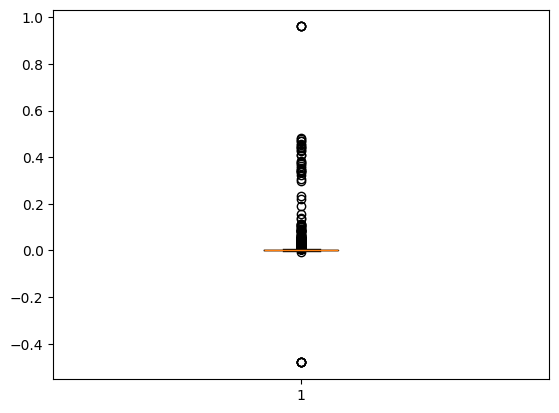

In [11]:
fm_box=plt.boxplot(x='FM',data=df)
#getting outliers
fm_out=[]
for item in fm_box['fliers']:
    fm_out.append(item.get_ydata())
print(fm_out)    

#getting wiskers
print("whiskers=",[item.get_ydata()[1] for item in fm_box['whiskers']])

#removing outliers
df.FM[(df.FM)>0.006272401]=0.006272401
df.FM[(df.FM)<-0.003434785]=-0.003434785

[array([-0.01492537, -0.01492537, -0.01492537, -0.01492537,  0.02985075,
        0.02985075,  0.02985075,  0.01492537,  0.02993591,  0.02985075,
        0.03000183,  0.01386139,  0.01437372])]
whiskers= [-0.000131558, 0.012987013]


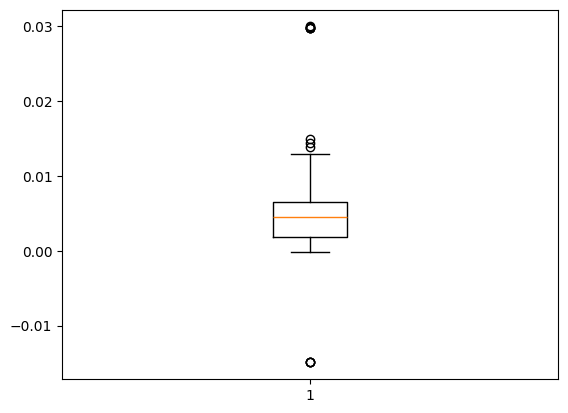

In [12]:
uc_box=plt.boxplot(x='UC',data=df)
#getting outliers
uc_out=[]
for item in uc_box['fliers']:
    uc_out.append(item.get_ydata())
print(uc_out)
print("whiskers=",[item.get_ydata()[1] for item in uc_box['whiskers']])
# removing outliers
df.UC[(df.UC)>0.012987013]=0.012987013
df.UC[(df.UC)<-0.000131558]=-0.000131558

[array([-0.01538462, -0.01538462, -0.01538462, -0.01539347, -0.01538462,
       -0.01538462,  0.00944386,  0.00841515,  0.00834028,  0.01215805,
        0.01000834,  0.01416431,  0.00963698,  0.00849858,  0.00829875,
        0.01154401,  0.01538462,  0.03076923,  0.03062062,  0.03076923,
        0.01385042,  0.01062802,  0.01362398,  0.01165803,  0.00933489,
        0.01076716,  0.03076923,  0.01      ,  0.00920245,  0.00887574,
        0.00876095,  0.00831601,  0.01089325,  0.01231527,  0.01144165,
        0.00847458,  0.00921659,  0.0106383 ,  0.00824176,  0.00877193,
        0.00944206,  0.01144984,  0.01415094,  0.01474202,  0.00824742,
        0.0105042 ,  0.01259446,  0.0089251 ,  0.00862952,  0.00917431,
        0.00896861,  0.00847458,  0.0087146 ,  0.00843882,  0.01224847,
        0.01237345,  0.01263158,  0.01119403,  0.01352657,  0.00853242,
        0.00829016,  0.00926843,  0.01034929,  0.00935829,  0.01227679,
        0.01306413,  0.01179941,  0.01057579,  0.00865385,  0.0

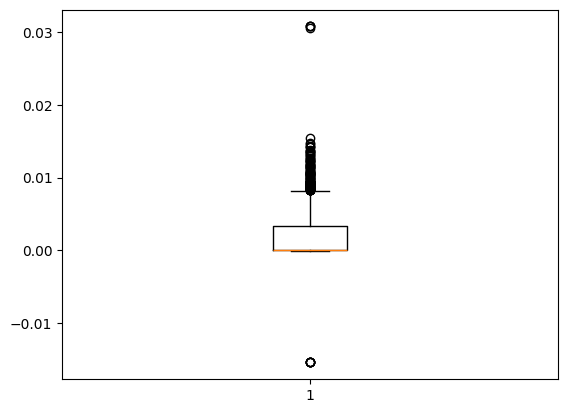

In [13]:
dl_box=plt.boxplot(x='DL',data=df)
#getting outliers
dl_out=[]
for item in dl_box['fliers']:
    dl_out.append(item.get_ydata())
print(dl_out)
print("whiskers=",[item.get_ydata()[1] for item in dl_box['whiskers']])
df.DL[(df.DL)>0.008196721]=0.008196721
df.DL[(df.DL)<-0.00012386]=-0.00012386

[array([-1.79000000e-06, -3.24000000e-06, -2.26000000e-06, -2.22000000e-06,
       -3.09000000e-06, -2.52000000e-06, -3.27000000e-06, -1.09000000e-06,
       -5.37000000e-06, -1.70000000e-06, -4.21000000e-06, -8.96000000e-08,
       -3.98000000e-07, -4.76000000e-07, -2.61000000e-07, -2.51000000e-06,
       -2.90000000e-06, -2.50000000e-06, -2.05000000e-06, -1.35318000e-03,
       -5.05000000e-06, -1.22000000e-07, -3.45000000e-07, -7.38000000e-07,
       -8.13000000e-07, -6.65000000e-06, -8.23000000e-07, -8.07000000e-07,
       -1.23000000e-06, -1.35318000e-03, -1.35318000e-03, -4.01000000e-06,
       -2.59000000e-06, -6.52000000e-06, -2.47000000e-06, -1.35318000e-03,
       -1.47000000e-06, -4.74000000e-07, -2.01000000e-06, -3.74000000e-07,
       -1.35318000e-03, -1.55000000e-06, -3.84000000e-06, -1.35318000e-03,
       -8.51000000e-10, -1.55000000e-09, -6.05000000e-08, -3.62000000e-07,
       -1.07000000e-06, -4.11000000e-06, -1.35318000e-03, -2.12000000e-06,
       -8.72000000e-07, 

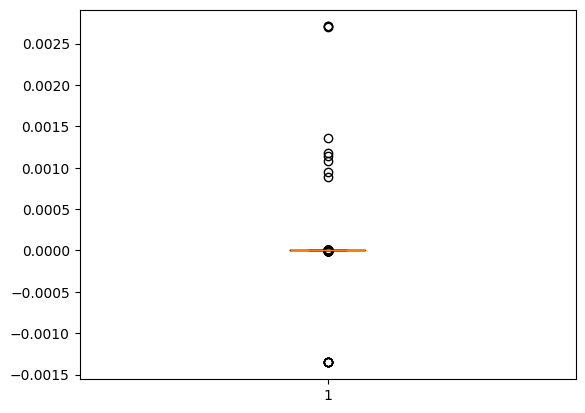

In [14]:
ds_box=plt.boxplot(x='DS',data=df)
#getting outliers
ds_out=[]
for item in ds_box['fliers']:
    ds_out.append(item.get_ydata())
print(ds_out)
print("whiskers=",[item.get_ydata()[1] for item in ds_box['whiskers']])

[array([-1.35000000e-05, -5.34759400e-03, -5.69000000e-06, -6.21000000e-06,
       -5.34759400e-03, -2.97000000e-05, -2.74000000e-06, -2.19000000e-05,
       -2.56000000e-06, -1.03000000e-05, -1.63000000e-05, -1.57000000e-05,
       -2.25000000e-05, -3.43000000e-05, -1.02000000e-06, -9.36000000e-06,
       -2.04000000e-05, -1.88000000e-05, -4.38000000e-05, -5.17000000e-06,
       -4.48000000e-05, -1.36000000e-05, -1.87000000e-05, -1.83000000e-05,
       -2.81000000e-05, -2.75000000e-06, -4.03000000e-06, -2.08000000e-05,
       -1.77000000e-05, -3.52000000e-06, -1.53000000e-06, -3.37000000e-05,
       -6.99000000e-06, -5.34759400e-03, -1.50000000e-05, -2.02000000e-05,
       -1.49000000e-05, -1.70000000e-05, -2.44000000e-05, -8.84000000e-06,
       -1.50000000e-05, -1.26000000e-05, -3.03000000e-06, -7.03000000e-06,
       -5.34759400e-03, -1.79000000e-07, -2.35000000e-05, -2.59000000e-05,
       -1.73000000e-05, -1.82000000e-05, -3.45000000e-06, -2.58000000e-05,
        2.09863600e-03, 

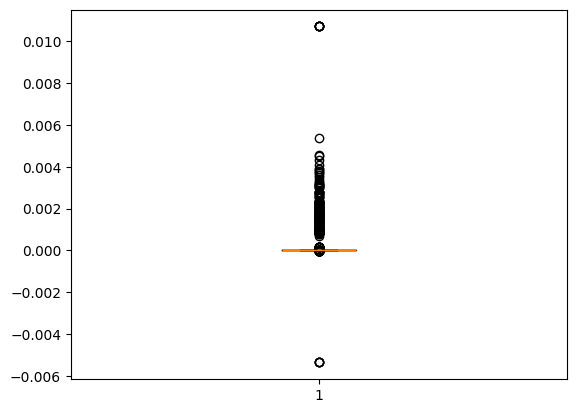

In [15]:
dp_box=plt.boxplot(x='DP',data=df)
#getting outliers
dp_out=[]
for item in dp_box['fliers']:
    dp_out.append(item.get_ydata())
print(dp_out)
print("whiskers=",[item.get_ydata()[1] for item in dp_box['whiskers']])

[array([-63., -63., -63., -63., -63., 162., 162., 162., 162., 162.])]
whiskers= [11.799845589503668, 87.0]


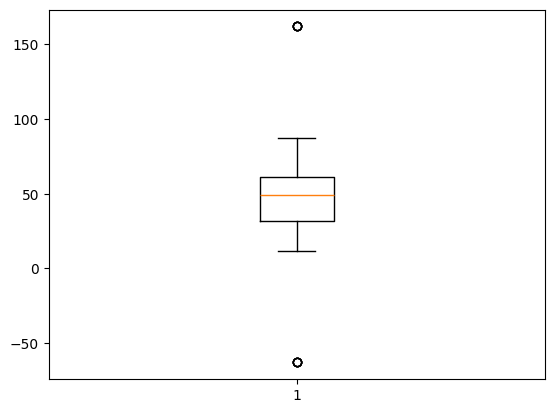

In [16]:
astv_box=plt.boxplot(x='ASTV',data=df)
#getting outliers
astv_out=[]
for item in astv_box['fliers']:
    astv_out.append(item.get_ydata())
print(astv_out)
print("whiskers=",[item.get_ydata()[1] for item in astv_box['whiskers']])
df.ASTV[(df.ASTV)>=87.0]=87.0
df.ASTV[(df.ASTV)<=11.799845589503668]=11.799845589503668

[array([-6.6       , -6.6       , -6.6       ,  5.9       ,  6.3       ,
        4.4       ,  6.        ,  4.5       ,  6.9       ,  3.4       ,
        3.7       ,  3.4       ,  3.6       ,  4.4       ,  4.7       ,
        4.9       ,  5.        ,  7.        ,  4.1       ,  5.4       ,
        3.9       ,  5.2       ,  4.8       ,  4.3       ,  3.7       ,
        5.3       ,  4.8       ,  3.4       ,  3.3       ,  3.4       ,
        3.4       ,  3.8       , 13.8       ,  3.7       , 13.8       ,
        5.7       ,  4.9       ,  5.        ,  4.        ,  5.4       ,
        3.5       ,  3.4       ,  3.4       ,  3.8       ,  3.78426342,
        4.1       ,  4.9       ,  6.3       ,  4.5       ,  3.6       ,
        3.3       ,  3.4       , 13.8       ,  3.6       , 13.8       ,
        3.5       ,  3.8       ,  3.4       ,  3.4       , 13.8       ,
        3.8       ,  4.2       ,  3.3       ,  3.6       ,  3.40163125,
        3.3       ,  3.5       ,  4.00874906,  3.8       ,  3.4

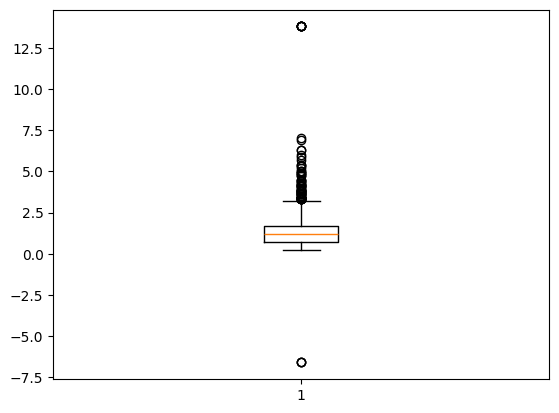

In [17]:
mstv_box=plt.boxplot(x='MSTV',data=df)
#getting outliers
mstv_out=[]
for item in mstv_box['fliers']:
    mstv_out.append(item.get_ydata())
print(mstv_out)
print("whiskers=",[item.get_ydata()[1] for item in mstv_box['whiskers']])
df.MSTV[(df.MSTV)>3.2]=3.2
df.MSTV[(df.MSTV)<0.2]=0.2

[array([-91.        , -91.        , -91.        ,  43.        ,
        79.        ,  72.        ,  71.        ,  40.        ,
        69.        ,  54.        ,  53.        ,  38.        ,
        29.        ,  36.64007017,  29.        ,  67.        ,
        68.        ,  75.        ,  74.        ,  30.        ,
        49.        ,  39.        ,  30.19893853,  32.        ,
       182.        ,  34.        ,  38.        ,  31.        ,
        58.        ,  39.        ,  46.        ,  57.        ,
        75.        ,  28.85072021,  33.        ,  40.        ,
        51.        ,  37.        , 182.        ,  34.40761222,
        34.        ,  54.        ,  58.        ,  52.        ,
        32.        ,  38.        ,  59.        ,  78.        ,
        84.        ,  71.        ,  59.        ,  52.        ,
        62.        ,  39.        ,  45.        ,  30.        ,
        45.        ,  35.        ,  67.        ,  71.54948564,
        45.        ,  58.        ,  32.        ,  41. 

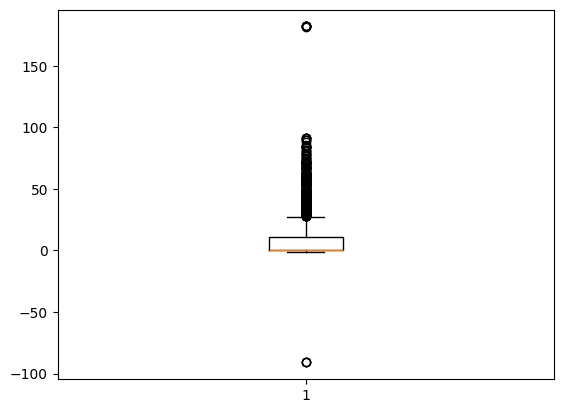

In [18]:
altv_box=plt.boxplot(x='ALTV',data=df)
#getting outliers
altv_out=[]
for item in altv_box['fliers']:
    altv_out.append(item.get_ydata())
print(altv_out)
print("whiskers=",[item.get_ydata()[1] for item in altv_box['whiskers']])
df.ALTV[(df.ALTV)>27.0]=27.0
df.ALTV[(df.ALTV)<-1.043619084]=-1.043619084

[array([-50.7       , -50.7       , -50.7       , -50.7       ,
       -50.7       ,  23.        ,  27.6       ,  29.5       ,
        21.7       ,  24.2       ,  22.1       ,  21.1       ,
        22.2       ,  22.3       ,  21.3       ,  25.9       ,
        23.4       ,  26.3       ,  35.7       ,  41.8       ,
        50.7       ,  25.8       ,  23.3       ,  28.4       ,
        21.4       ,  20.5       ,  29.6       ,  29.3       ,
        22.98483551,  34.7       ,  21.7       ,  27.3       ,
        20.5       ,  26.3       ,  24.7       ,  21.5       ,
        27.3       ,  25.6       ,  26.1       ,  36.9       ,
        27.6       ,  29.        ,  28.        ,  21.7       ,
        23.76736645,  40.8       ,  21.55162378,  25.8       ,
        21.4       ,  21.3       ,  25.2       ,  21.9       ,
        20.8       ,  21.3       ,  22.3       ,  24.1       ,
        22.5       ,  27.        ,  23.4       ,  20.4       ,
        29.1       ,  28.9       ,  21.1       ,  20.8

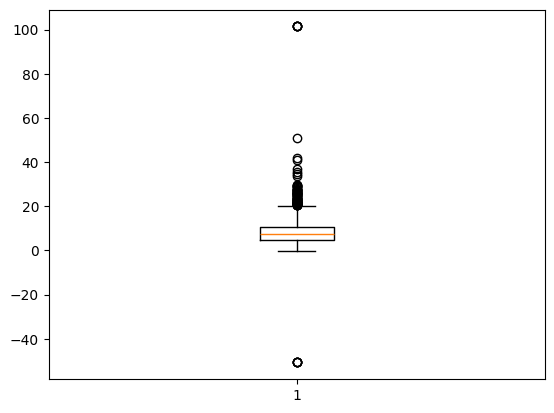

In [19]:
mltv_box=plt.boxplot(x='MLTV',data=df)
#getting outliers
mltv_out=[]
for item in mltv_box['fliers']:
    mltv_out.append(item.get_ydata())
print(mltv_out)
print("whiskers=",[item.get_ydata()[1] for item in mltv_box['whiskers']])
df.MLTV[(df.MLTV)>20.040354137842986]=20.040354137842986
df.MLTV[(df.MLTV)<-0.200787599]=-0.200787599

[array([-174., -174., -174., -174., -174.,  357.,  357.,  357.,  357.,
        357.])]
whiskers= [3.0, 180.0]


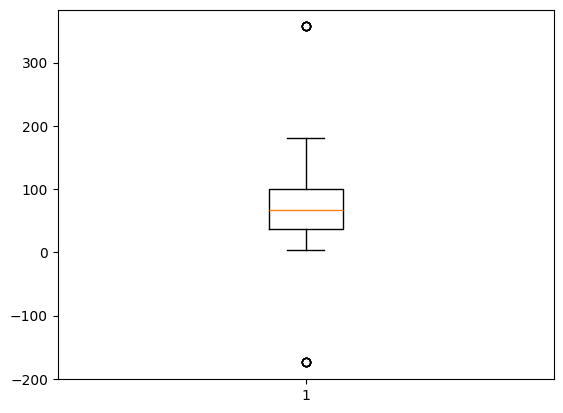

In [20]:
w_box=plt.boxplot(x='Width',data=df)
w_out=[]
for item in w_box['fliers']:
    w_out.append(item.get_ydata())
print(w_out)
print("whiskers=",[item.get_ydata()[1] for item in w_box['whiskers']])
df.Width[(df.Width)>180.0]=180.0
df.Width[(df.Width)<3.0]=3.0

[array([-3.        , -3.        , -2.99631374, -3.        , -3.        ,
       -3.        ,  3.        ,  3.        ,  3.        ,  3.        ])]
whiskers= [-1.006614223, 1.0236349413476755]


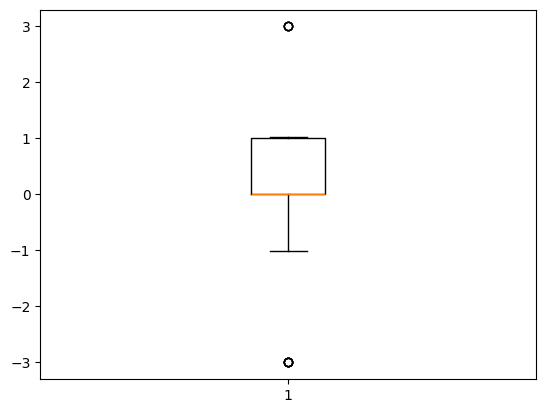

In [21]:
ten_box=plt.boxplot(x='Tendency',data=df)
#getting outliers
ten_out=[]
for item in ten_box['fliers']:
    ten_out.append(item.get_ydata())
print(ten_out)
print("whiskers=",[item.get_ydata()[1] for item in ten_box['whiskers']])
df.Tendency[(df.Tendency)>1.0236349413476755]=1.0236349413476755
df.Tendency[(df.Tendency)<-1.006614223]=-1.006614223

[array([-1.025988  ,  0.99671416,  0.99775653,  0.99792058,  0.99796582,
        0.98342028, -1.        , -1.        ,  0.99418412,  0.97544038,
        0.99223419,  0.99768784,  0.98122639,  0.99120013,  0.98483388,
        0.99284679,  0.99597399,  0.97973798,  0.99167495,  0.98839285,
        0.98749813,  0.99379572,  0.98900567,  0.99634758,  0.99106613,
       -1.        ,  0.98145959,  0.9959162 ,  0.97230458,  0.9670755 ,
        0.98479205,  0.99986549, -1.        ,  0.98952542,  0.97817368,
        0.96944689,  0.97927954,  0.99747931, -1.        ,  0.98925697,
        0.99663093,  0.98839898,  0.99661416,  0.9979391 ,  0.99443184,
        0.99972369,  0.99391695,  0.99829981,  0.99369481,  0.98986216,
        2.        ,  3.        ,  3.        ,  3.        ,  3.        ,
        2.        ,  2.        ,  2.        ,  3.        ,  3.        ,
        3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
        2.        ,  1.01084882,  2.        ,  2.        ,  3.0

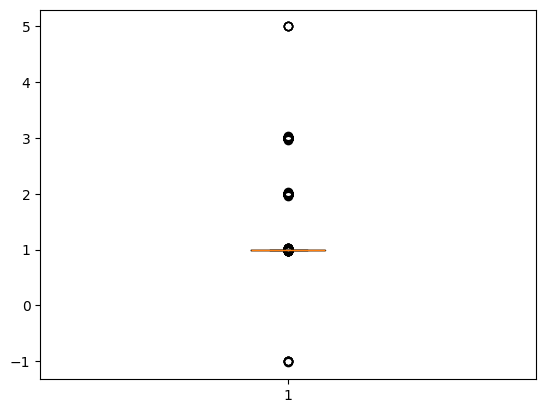

In [22]:
nsp_box=plt.boxplot(x='NSP',data=df)
#getting outliers
nsp_out=[]
for item in nsp_box['fliers']:
    nsp_out.append(item.get_ydata())
print(nsp_out)
print("whiskers=",[item.get_ydata()[1] for item in nsp_box['whiskers']])

In [23]:
df.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.292784,0.003145,0.001546,0.004369,0.001783,0.000002,0.000175,46.995513,1.306055,6.639406,8.015921,70.395387,0.315152,1.301499
std,9.917214,0.003790,0.002437,0.002972,0.002643,0.000141,0.000836,17.351007,0.778184,10.197359,5.019964,39.117524,0.612357,0.642133
min,106.000000,-0.000185,-0.003435,-0.000132,-0.000124,-0.001353,-0.005348,11.799846,0.200000,-1.043619,-0.200788,3.000000,-1.006614,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,160.000000,0.013861,0.006272,0.012987,0.008197,0.002706,0.010695,87.000000,3.200000,27.000000,20.040354,180.000000,1.023635,5.000000


It observed that some of the columns contain same mean and median as '0'

In [24]:
mean=df.mean()
median=df.median()
std=df.std()
print(mean)

LB          133.292784
AC            0.003145
FM            0.001546
UC            0.004369
DL            0.001783
DS            0.000002
DP            0.000175
ASTV         46.995513
MSTV          1.306055
ALTV          6.639406
MLTV          8.015921
Width        70.395387
Tendency      0.315152
NSP           1.301499
dtype: float64


In [25]:
median

LB          133.000000
AC            0.001634
FM            0.000000
UC            0.004484
DL            0.000000
DS            0.000000
DP            0.000000
ASTV         49.000000
MSTV          1.200000
ALTV          0.000000
MLTV          7.400000
Width        67.000000
Tendency      0.000000
NSP           1.000000
dtype: float64

In [26]:
std

LB           9.917214
AC           0.003790
FM           0.002437
UC           0.002972
DL           0.002643
DS           0.000141
DP           0.000836
ASTV        17.351007
MSTV         0.778184
ALTV        10.197359
MLTV         5.019964
Width       39.117524
Tendency     0.612357
NSP          0.642133
dtype: float64

<Axes: >

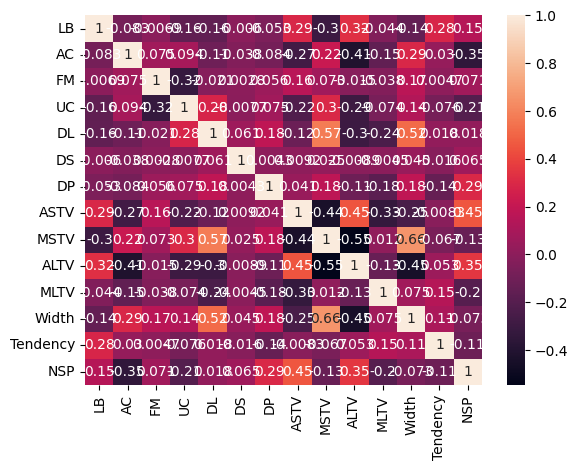

In [27]:
sns.heatmap(df.corr(),annot=True)

In [28]:
df

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,27.0,2.400000,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.400000,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.400000,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,20.040354,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.900000,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.006272,0.007426,0.000000,0.0,0.0,79.0,0.2,25.0,7.200000,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.0,7.100000,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.0,6.100000,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.0,7.000000,66.0,1.000000,2.000000


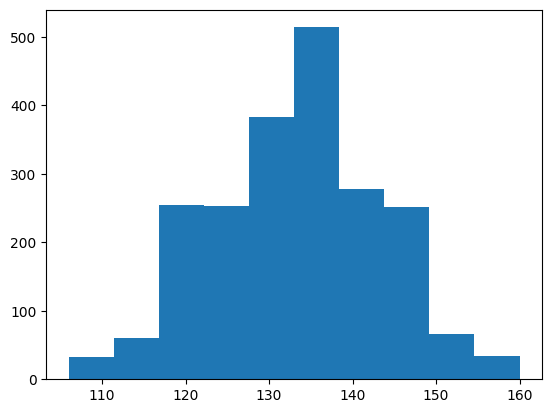

In [29]:
plt.hist(x='LB',data=df)
plt.show()

(array([978., 260., 184., 163., 157., 118.,  95.,  64.,  38.,  69.]),
 array([-0.00018486,  0.00121976,  0.00262439,  0.00402901,  0.00543364,
         0.00683826,  0.00824289,  0.00964751,  0.01105214,  0.01245676,
         0.01386139]),
 <BarContainer object of 10 artists>)

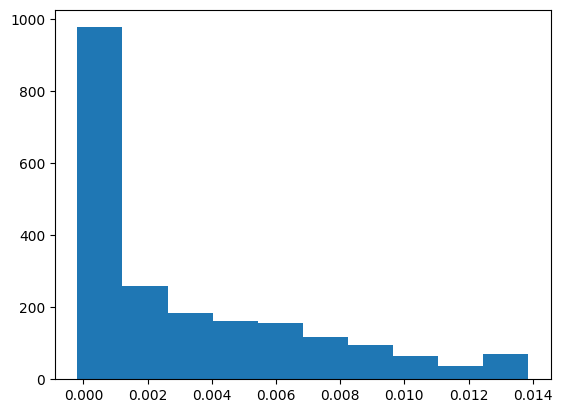

In [30]:
plt.hist(x="AC",data=df)